In [2]:
from glob import glob
import os
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
path_root = "/scratch/jrevan21/analysis_space/"

In [4]:
group_name = "helices_periodic_nopadding/"
all_data = []

In [5]:
for d in glob(path_root + group_name + "*/*/*"):
    energy_file = d + "/energy.dat"
    if not os.path.isfile(energy_file):
        print(f"Missing file {energy_file}!!!")
        continue
    rule, dentalRadius, temperature = d.split("/")[-3:]
    data = pd.read_csv(energy_file, sep="\s+", header=0, names=("t", "pe", "ke", "te"))
    data['rule'] = rule
    data['dentalRadius'] = dentalRadius
    data['temperature'] = temperature
    data['name'] = "_".join([rule, dentalRadius, temperature])
    all_data.append(data)

data = pd.concat(all_data, axis='index')

Missing file /scratch/jrevan21/analysis_space/helices_periodic_nopadding/R2/radius0.05/T_0.1/energy.dat!!!
Missing file /scratch/jrevan21/analysis_space/helices_periodic_nopadding/R2/radius0.05/T_0.13/energy.dat!!!
Missing file /scratch/jrevan21/analysis_space/helices_periodic_nopadding/R2/radius0.05/T_0.11/energy.dat!!!
Missing file /scratch/jrevan21/analysis_space/helices_periodic_nopadding/R2/radius0.05/T_0.07/energy.dat!!!
Missing file /scratch/jrevan21/analysis_space/helices_periodic_nopadding/R2/radius0.05/T_0.09/energy.dat!!!
Missing file /scratch/jrevan21/analysis_space/helices_periodic_nopadding/R2/radius0.5/T_0.07/energy.dat!!!
Missing file /scratch/jrevan21/analysis_space/helices_periodic_nopadding/R2/radius0.5/T_0.09/energy.dat!!!
Missing file /scratch/jrevan21/analysis_space/helices_periodic_nopadding/R2/radius0.5/T_0.13/energy.dat!!!
Missing file /scratch/jrevan21/analysis_space/helices_periodic_nopadding/R2/radius0.5/T_0.11/energy.dat!!!
Missing file /scratch/jrevan21/an

In [6]:
df = data[data['t'] % 1e4 == 0]

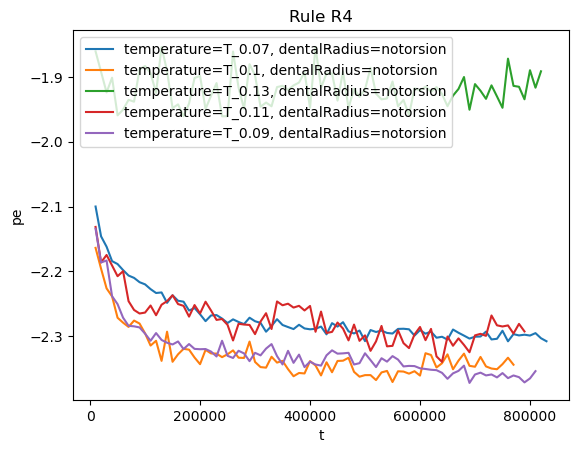

In [9]:
# Assuming you already have a Pandas dataframe called 'df'
# with the columns ['t', 'pe', 'ke', 'te', 'rule', 'dentalRadius', 'temperature', 'name']

# Get unique values from the 'rule', 'temperature', and 'dentalRadius' columns
unique_rules = df['rule'].unique()
unique_temperatures = df['temperature'].unique()
unique_dental_radius = df['dentalRadius'].unique()

# Assign a different color for each unique temperature
colors = plt.cm.tab10(range(len(unique_temperatures)))

# Set up different line styles for each unique dentalRadius
line_styles = ['-', '--', ':']

# Create a separate plot for each unique rule
for rule in unique_rules:
    rule_df = df[df['rule'] == rule]  # Filter dataframe by rule
    
    # Create a new figure and axis for each rule
    fig, ax = plt.subplots()
    
    # Plot the data for each unique temperature with a different color and line style
    for temperature, color in zip(unique_temperatures, colors):
        temp_df = rule_df[rule_df['temperature'] == temperature]  # Filter dataframe by temperature
        
        for dental_radius, line_style in zip(unique_dental_radius, line_styles):
            dental_radius_df = temp_df[temp_df['dentalRadius'] == dental_radius]  # Filter dataframe by dentalRadius
            
            # Sort the dataframe by 't' column
            dental_radius_df = dental_radius_df.sort_values('t')
            
            # Plot 't' on the x-axis and 'pe' on the y-axis with the assigned color and line style
            ax.plot(dental_radius_df['t'], dental_radius_df['pe'], label=f"temperature={temperature}, dentalRadius={dental_radius}",
                    color=color, linestyle=line_style)
    
    # Set the x-axis label
    ax.set_xlabel('t')
    
    # Set the y-axis label
    ax.set_ylabel('pe')
    
    # Set the title for each axis
    ax.set_title(f"Rule {rule}")
    
    # Add a legend for each axis
    ax.legend(loc="upper left")
    
    # Show the plot for each rule
    plt.show()
